## **Plotando gráficos do XPS**

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from lmfit import Model
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
from matplotlib import gridspec

from lmfit.models import (
    GaussianModel,
    LorentzianModel,
    VoigtModel,
    ExponentialModel,
    ConstantModel,
    StepModel,
    PowerLawModel,
    PolynomialModel,
    LinearModel
)

## **Definindo Funções Auxiliares**

$$E_b = h\nu - E_k - \phi$$

In [21]:
def basic_plot(X, y, dpi=100):
    def formatar_espaco(x, pos):
        return f"{x:,.0f}".replace(",", " ")

    plt.figure(figsize=(10,6), dpi=dpi)
    plt.scatter(X, y, color="dodgerblue", s=8)
    plt.xlabel("Energia de ligação (eV)", fontsize=12)
    plt.ylabel("Intensidade (u.a.)", fontsize=12)
    plt.title("Gráfico XPS - Básico", fontweight="bold", fontsize=12)
    plt.grid(linestyle="--", linewidth=0.6, alpha=0.5)

    ax = plt.gca()
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(6))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(6))
    ax.tick_params(axis="both", which="major", length=8, width=1)
    ax.tick_params(axis="both", which="minor", length=4, width=0.7)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))

    ax.invert_xaxis()
    
    plt.show()

plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",
    "font.size": 12 
})


K.E.   Counts  Unnamed: 2    B.E.      CPS
0  1188.6  1376.35         NaN  298.08  2752.70
1  1188.7  1415.99         NaN  297.98  2831.98
2  1188.8  1374.69         NaN  297.88  2749.38
3  1188.9  1382.64         NaN  297.78  2765.28
4  1189.0  1409.86         NaN  297.68  2819.72

(191, 5)


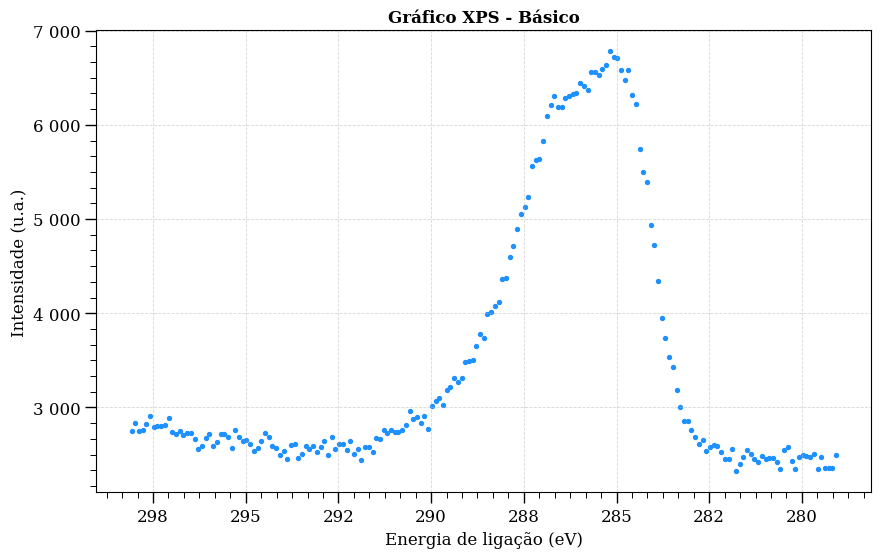

In [22]:
path_C1s = "dados/xps_c1s scan.csv"

df_C1s = pd.read_csv(path_C1s, skiprows=7)
dados_C1s = df_C1s[["B.E.", "CPS"]]

display(df_C1s.head())
print(df_C1s.shape)

X_C1s = np.array(df_C1s["B.E."])
y_C1s = np.array(df_C1s["CPS"])

basic_plot(X_C1s, y_C1s)

In [23]:
modelo_constante_C1s = ConstantModel(prefix='const_')
modelo_Voigt1_C1s = VoigtModel(prefix="v1_")
modelo_Voigt2_C1s = VoigtModel(prefix="v2_")
modelo_Voigt3_C1s = VoigtModel(prefix="v3_")
modelo_Voigt4_C1s = VoigtModel(prefix="v4_")

modelo_composto_C1s = (
  modelo_constante_C1s
  + modelo_Voigt1_C1s 
  + modelo_Voigt2_C1s 
  + modelo_Voigt3_C1s
  + modelo_Voigt4_C1s
)

print(f"Variável independente: {modelo_composto_C1s.independent_vars}")
print(f"Parâmetros do modelo: {modelo_composto_C1s.param_names}")

params_constante_C1s = modelo_constante_C1s.make_params()
params_Voigt1_C1s = modelo_Voigt1_C1s.make_params()
params_Voigt2_C1s = modelo_Voigt2_C1s.make_params()
params_Voigt3_C1s = modelo_Voigt3_C1s.make_params()
params_Voigt4_C1s = modelo_Voigt4_C1s.make_params()

params_C1s = (
  params_constante_C1s
  + params_Voigt1_C1s 
  + params_Voigt2_C1s 
  + params_Voigt3_C1s
  + params_Voigt4_C1s
)

display(params_C1s)

Variável independente: [np.str_('x')]
Parâmetros do modelo: ['const_c', 'v1_amplitude', 'v1_center', 'v1_sigma', 'v2_amplitude', 'v2_center', 'v2_sigma', 'v3_amplitude', 'v3_center', 'v3_sigma', 'v4_amplitude', 'v4_center', 'v4_sigma']


Parameters([('const_c', <Parameter 'const_c', value=0.0, bounds=[-inf:inf]>), ('v1_amplitude', <Parameter 'v1_amplitude', value=1.0, bounds=[-inf:inf]>), ('v1_center', <Parameter 'v1_center', value=0.0, bounds=[-inf:inf]>), ('v1_sigma', <Parameter 'v1_sigma', value=1.0, bounds=[0:inf]>), ('v1_gamma', <Parameter 'v1_gamma', value=1.0, bounds=[-inf:inf], expr='v1_sigma'>), ('v1_fwhm', <Parameter 'v1_fwhm', value=np.float64(3.6012906381881353), bounds=[-inf:inf], expr='1.0692*v1_gamma+sqrt(0.8664*v1_gamma**2+5.545083*v1_sigma**2)'>), ('v1_height', <Parameter 'v1_height', value=np.float64(0.20870928052036772), bounds=[-inf:inf], expr='(v1_amplitude/(max(1e-15, v1_sigma*sqrt(2*pi))))*real(wofz((1j*v1_gamma)/(max(1e-15, v1_sigma*sqrt(2)))))'>), ('v2_amplitude', <Parameter 'v2_amplitude', value=1.0, bounds=[-inf:inf]>), ('v2_center', <Parameter 'v2_center', value=0.0, bounds=[-inf:inf]>), ('v2_sigma', <Parameter 'v2_sigma', value=1.0, bounds=[0:inf]>), ('v2_gamma', <Parameter 'v2_gamma', value=1.0, bounds=[-inf:inf], expr='v2_sigma'>), ('v2_fwhm', <Parameter 'v2_fwhm', value=np.float64(3.6012906381881353), bounds=[-inf:inf], expr='1.0692*v2_gamma+sqrt(0.8664*v2_gamma**2+5.545083*v2_sigma**2)'>), ('v2_height', <Parameter 'v2_height', value=np.float64(0.20870928052036772), bounds=[-inf:inf], expr='(v2_amplitude/(max(1e-15, v2_sigma*sqrt(2*pi))))*real(wofz((1j*v2_gamma)/(max(1e-15, v2_sigma*sqrt(2)))))'>), ('v3_amplitude', <Parameter 'v3_amplitude', value=1.0, bounds=[-inf:inf]>), ('v3_center', <Parameter 'v3_center', value=0.0, bounds=[-inf:inf]>), ('v3_sigma', <Parameter 'v3_sigma', value=1.0, bounds=[0:inf]>), ('v3_gamma', <Parameter 'v3_gamma', value=1.0, bounds=[-inf:inf], expr='v3_sigma'>), ('v3_fwhm', <Parameter 'v3_fwhm', value=np.float64(3.6012906381881353), bounds=[-inf:inf], expr='1.0692*v3_gamma+sqrt(0.8664*v3_gamma**2+5.545083*v3_sigma**2)'>), ('v3_height', <Parameter 'v3_height', value=np.float64(0.20870928052036772), bounds=[-inf:inf], expr='(v3_amplitude/(max(1e-15, v3_sigma*sqrt(2*pi))))*real(wofz((1j*v3_gamma)/(max(1e-15, v3_sigma*sqrt(2)))))'>), ('v4_amplitude', <Parameter 'v4_amplitude', value=1.0, bounds=[-inf:inf]>), ('v4_center', <Parameter 'v4_center', value=0.0, bounds=[-inf:inf]>), ('v4_sigma', <Parameter 'v4_sigma', value=1.0, bounds=[0:inf]>), ('v4_gamma', <Parameter 'v4_gamma', value=1.0, bounds=[-inf:inf], expr='v4_sigma'>), ('v4_fwhm', <Parameter 'v4_fwhm', value=np.float64(3.6012906381881353), bounds=[-inf:inf], expr='1.0692*v4_gamma+sqrt(0.8664*v4_gamma**2+5.545083*v4_sigma**2)'>), ('v4_height', <Parameter 'v4_height', value=np.float64(0.20870928052036772), bounds=[-inf:inf], expr='(v4_amplitude/(max(1e-15, v4_sigma*sqrt(2*pi))))*real(wofz((1j*v4_gamma)/(max(1e-15, v4_sigma*sqrt(2)))))'>)])

[[Model]]
    ((((Model(constant, prefix='const_') + Model(voigt, prefix='v1_')) + Model(voigt, prefix='v2_')) + Model(voigt, prefix='v3_')) + Model(voigt, prefix='v4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4166
    # data points      = 191
    # variables        = 14
    chi-square         = 1126325.23
    reduced chi-square = 6363.41941
    Akaike info crit   = 1686.29971
    Bayesian info crit = 1731.83154
    R-squared          = 0.99693031
[[Variables]]
    const_c:       2429.29540 +/- 26.9253799 (1.11%) (init = 2800)
    v1_amplitude:  7823.60021 +/- 390.388524 (4.99%) (init = 20300)
    v1_center:     285.000000 +/- 0.02933296 (0.01%) (init = 287)
    v1_sigma:      0.96698879 +/- 0.04796757 (4.96%) (init = 1.95)
    v1_gamma:     -0.18377350 +/- 0.08275230 (45.03%) (init = 1)
    v1_fwhm:       2.08699061 +/- 0.05288403 (2.53%) == '1.0692*v1_gamma+sqrt(0.8664*v1_gamma**2+5.545083*v1_sigma**2)'
    v1_height:     3781.90667 +/- 81.792211

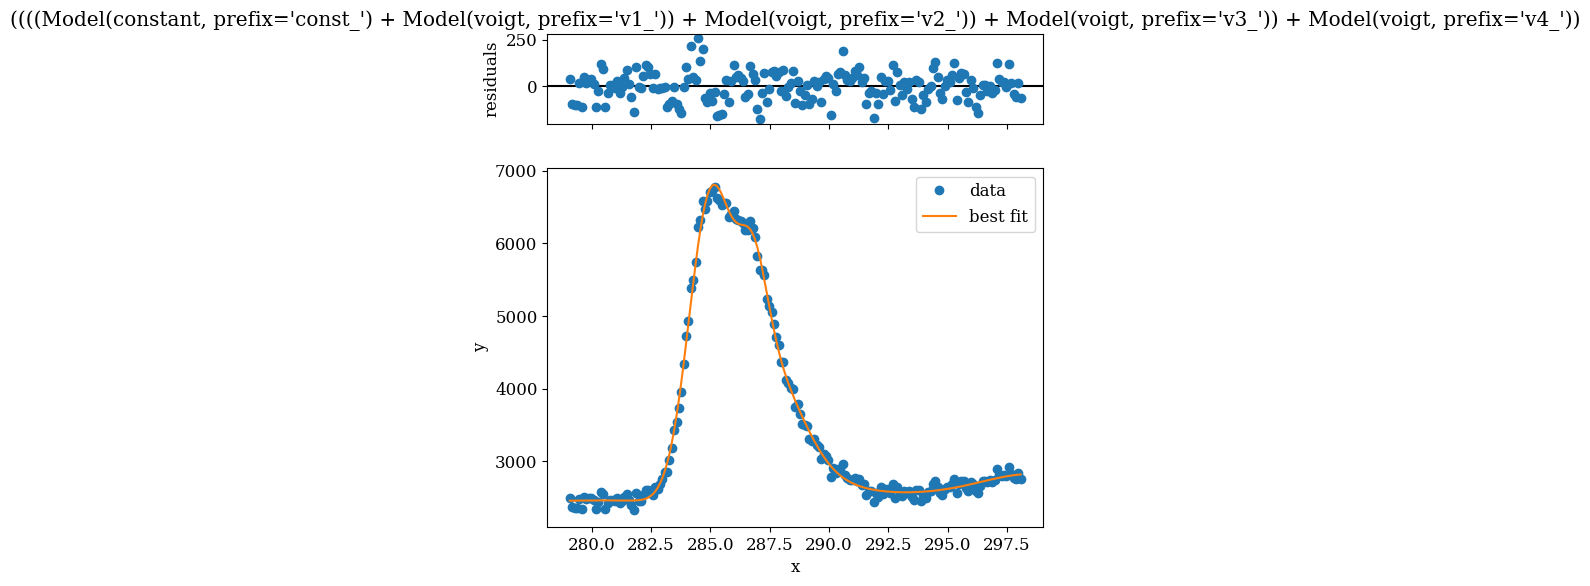

In [24]:
params_C1s["const_c"].set(value=2800)

params_C1s["v1_amplitude"].set(value=20300, min=4000)
params_C1s["v1_center"].set(value=287, min=285, max=289)
params_C1s["v1_sigma"].set(value=1.95, min=0.5, max=4)
params_C1s["v1_gamma"].set(vary=True)

params_C1s["v2_amplitude"].set(value=20800, min=4000)
params_C1s["v2_center"].set(value=285, min=284.8, max=288)
params_C1s["v2_sigma"].set(value=1.4, min=0.5, max=5)
params_C1s["v2_gamma"].set(vary=False)

params_C1s["v3_amplitude"].set(value=1000, min=200)
params_C1s["v3_center"].set(value=289, min=288, max=302)
params_C1s["v3_sigma"].set(value=0.9, min=0.2, max=5)
params_C1s["v3_gamma"].set(vary=False)

params_C1s["v4_amplitude"].set(value=8000, min=100)
params_C1s["v4_center"].set(value=297.5, min=288, max=302)
params_C1s["v4_sigma"].set(value=1, min=0.2, max=5)
params_C1s["v4_gamma"].set(vary=False)

resultado_C1s = modelo_composto_C1s.fit(y_C1s, params_C1s, x=X_C1s)
resultado_C1s.plot();   

print(resultado_C1s.fit_report())

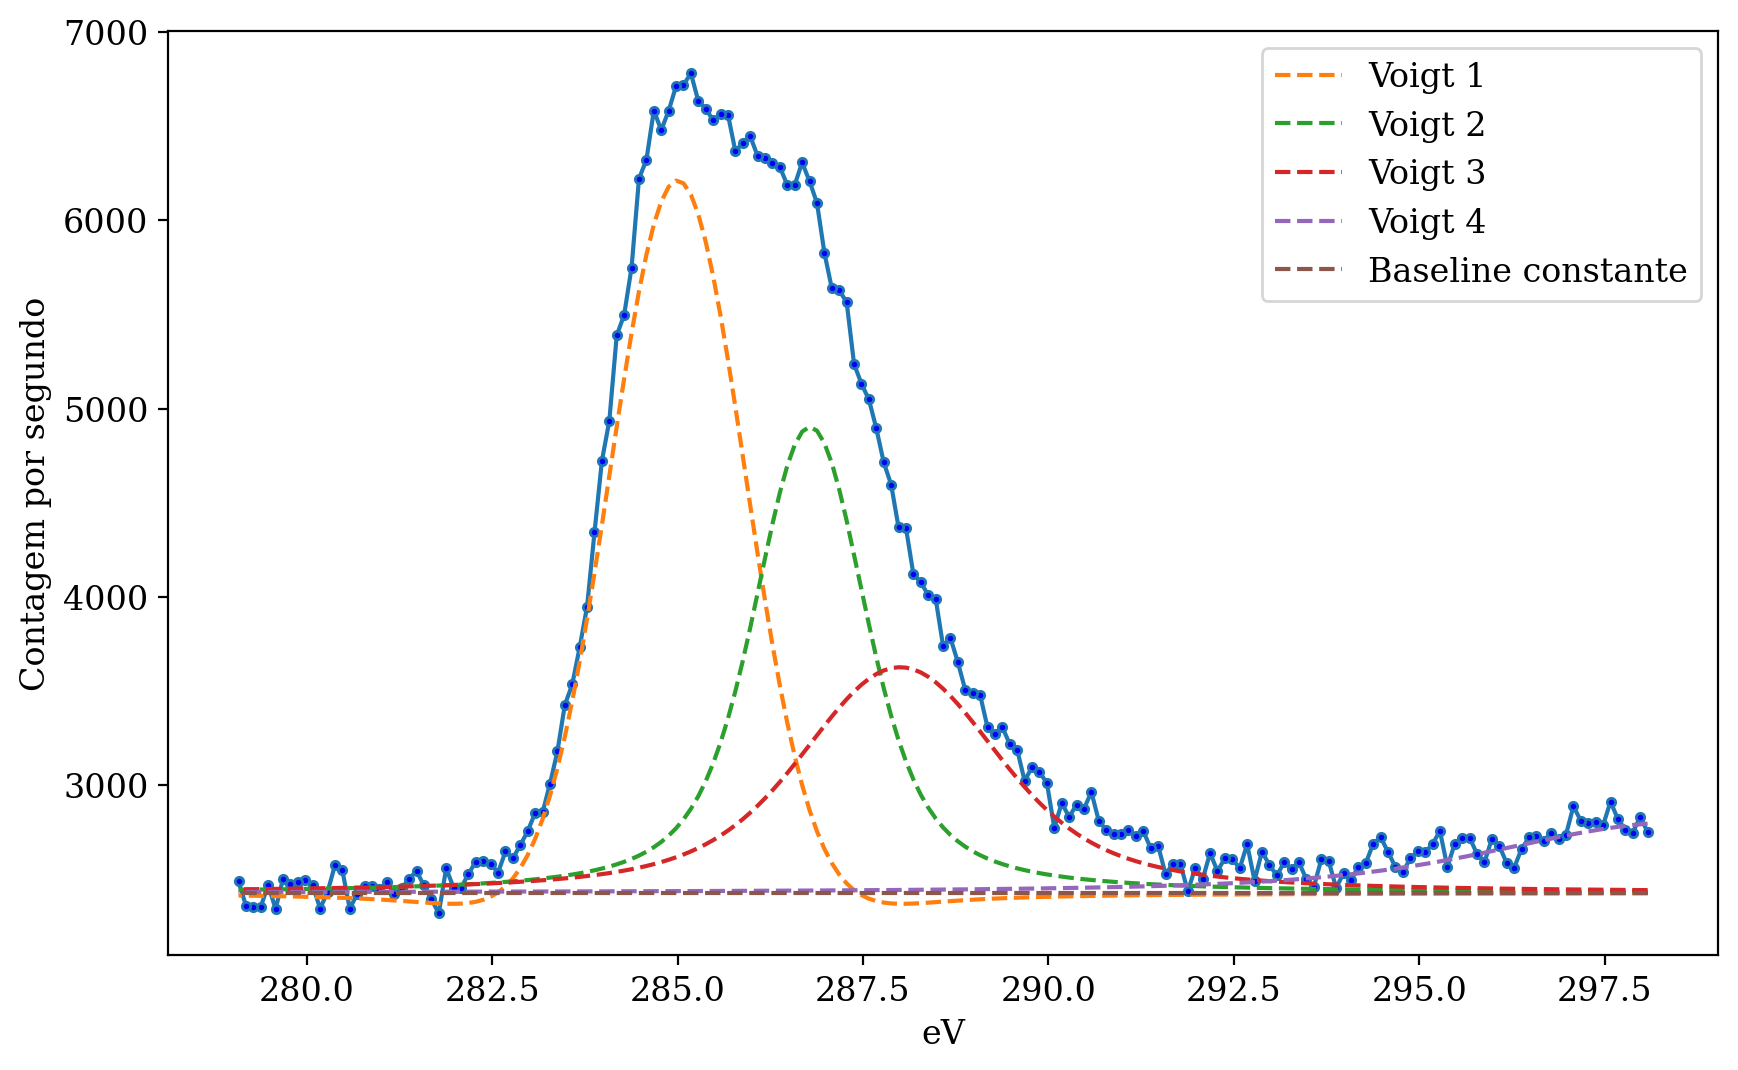

In [25]:
componentes = resultado_C1s.eval_components(x=X_C1s)
c = componentes["const_"][0]

fig, eixo = plt.subplots(figsize=(10, 6), dpi=200)
eixo.plot(X_C1s, y_C1s, marker="o", markerfacecolor="blue", markersize=3)
eixo.plot(X_C1s, componentes["v1_"] + c, "--", label="Voigt 1")
eixo.plot(X_C1s, componentes["v2_"] + c, "--", label="Voigt 2")
eixo.plot(X_C1s, componentes["v3_"] + c, "--", label="Voigt 3")
eixo.plot(X_C1s, componentes["v4_"] + c, "--", label="Voigt 4")
eixo.plot(X_C1s, np.ones(len(X_C1s)) * componentes["const_"], "--", label="Baseline constante")
eixo.set(xlabel="eV", ylabel="Contagem por segundo")
eixo.legend();

In [26]:
def configurar_eixos(ax):
    def formatar_espaco(x, pos):
        return f'{x:,.0f}'.replace(',', ' ')
    
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(6))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(6))
    ax.tick_params(axis='both', which='major', length=8, width=1)
    ax.tick_params(axis='both', which='minor', length=4, width=0.7)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))

### **Gráfico Final - C1s**

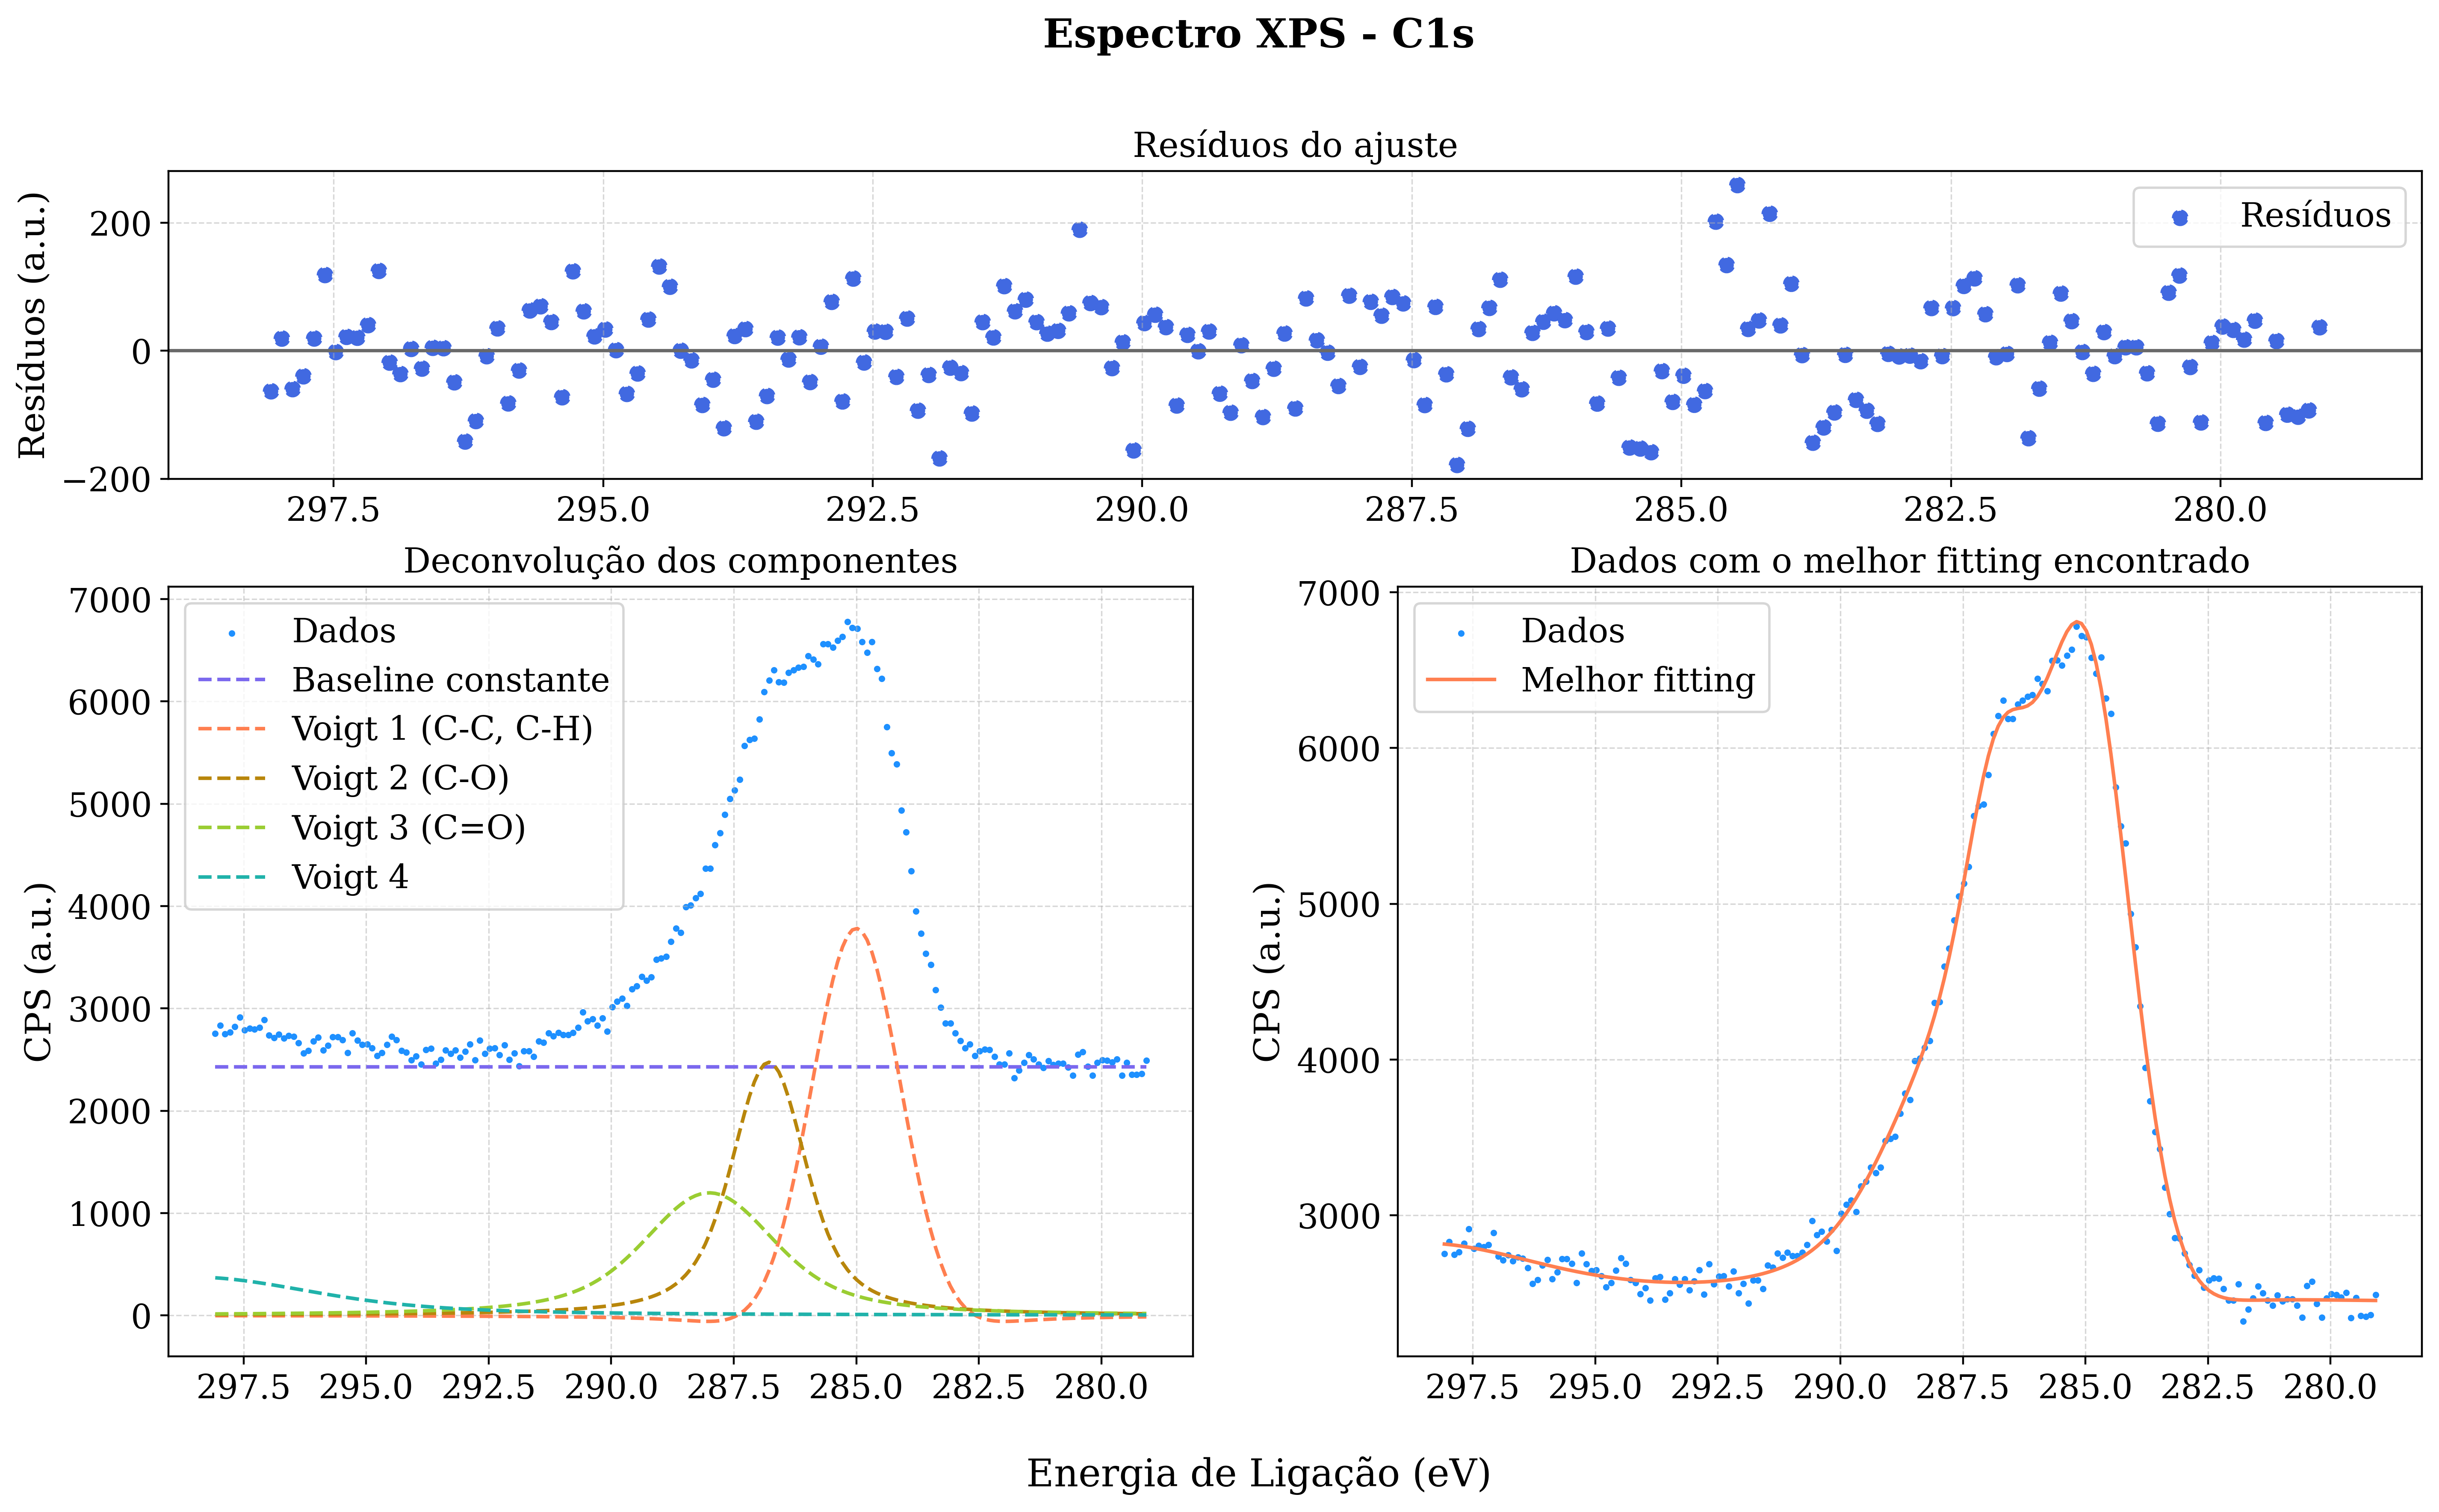

In [27]:
residuo_C1s = resultado_C1s.residual
melhor_fit_C1s = resultado_C1s.best_fit
componentes = resultado_C1s.eval_components(x=X_C1s) 

fig = plt.figure(figsize=(17, 9), dpi=400)
gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[0.4, 1])

ax1 = fig.add_subplot(gs[0, :])
ax1.scatter(X_C1s, residuo_C1s, linestyle="--", marker="o", label="Resíduos", c="royalblue")
ax1.axhline(y=0, color="dimgray", linestyle='-', linewidth=1.4)
ax1.grid(linestyle='--', linewidth=0.6, alpha=0.5)
ax1.set_title("Resíduos do ajuste")
ax1.set_ylabel("Resíduos (a.u.)", fontsize=15)
ax1.invert_xaxis()
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(fontsize=14)

ax2 = fig.add_subplot(gs[1, 0])
ax2.scatter(X_C1s, y_C1s, s=3, label="Dados", c="dodgerblue")
ax2.plot(X_C1s, componentes["const_"], linestyle="--", c="mediumslateblue", label="Baseline constante")
ax2.plot(X_C1s, componentes["v1_"], linestyle="--", label="Voigt 1 (C-C, C-H)", c="coral")
ax2.plot(X_C1s, componentes["v2_"], linestyle="--", label="Voigt 2 (C-O)", c="darkgoldenrod")
ax2.plot(X_C1s, componentes["v3_"], linestyle="--", label="Voigt 3 (C=O)", c="yellowgreen")
ax2.plot(X_C1s, componentes["v4_"], linestyle="--", label="Voigt 4", c="lightseagreen")
ax2.grid(linestyle='--', linewidth=0.6, alpha=0.5)
ax2.set_title("Deconvolução dos componentes")
ax2.set_ylabel("CPS (a.u.)", fontsize=15)
ax2.invert_xaxis()
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(fontsize=14)

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(X_C1s, y_C1s, s=3, label="Dados", c="dodgerblue")
ax3.plot(X_C1s, melhor_fit_C1s, c="coral", label="Melhor fitting")
ax3.grid(linestyle='--', linewidth=0.6, alpha=0.5)
ax3.set_title("Dados com o melhor fitting encontrado")
ax3.set_ylabel("CPS (a.u.)", fontsize=15)
ax3.invert_xaxis()
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax3.legend(fontsize=14)

fig.supxlabel("Energia de Ligação (eV)", fontsize=16, y=0.02)
fig.suptitle("Espectro XPS - C1s", fontsize=17, weight='bold', y=0.98)

plt.show()


### **O1s**

K.E.   Counts  Unnamed: 2    B.E.      CPS
0  941.6  3917.39         NaN  545.08  7834.78
1  941.7  3806.48         NaN  544.98  7612.96
2  941.8  3672.30         NaN  544.88  7344.60
3  941.9  3664.41         NaN  544.78  7328.82
4  942.0  3675.96         NaN  544.68  7351.92

(201, 5)


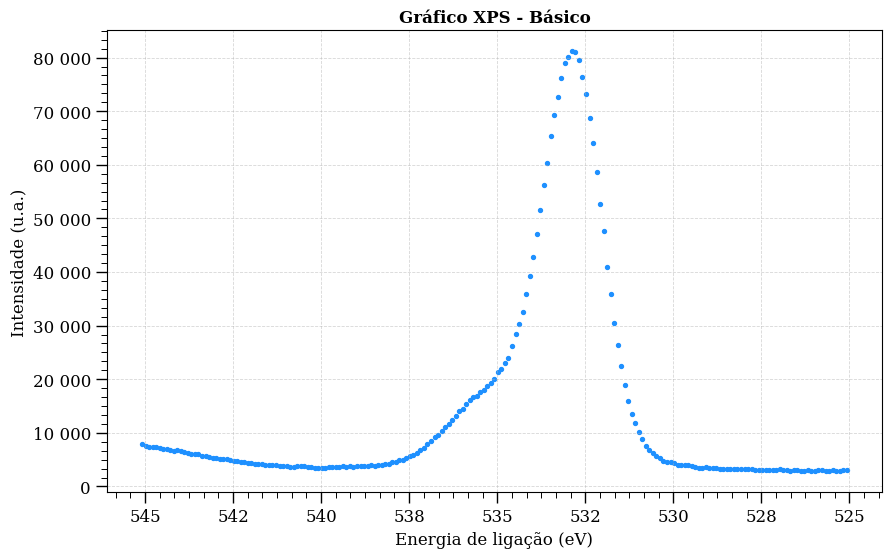

In [28]:
path_O1s = "dados/xps_o1s scan.csv"

df_O1s = pd.read_csv(path_O1s, skiprows=7)
dados_O1s = df_O1s[["B.E.", "CPS"]]

display(df_O1s.head())
print(df_O1s.shape)

X_O1s = np.array(df_O1s["B.E."])
y_O1s = np.array(df_O1s["CPS"])

basic_plot(X_O1s, y_O1s)

In [29]:
modelo_constante_O1s = ConstantModel(prefix="const_")
modelo_Voigt1_O1s = VoigtModel(prefix="v1_")
modelo_Voigt2_O1s = VoigtModel(prefix="v2_")
modelo_Voigt3_O1s = VoigtModel(prefix="v3_")

modelo_composto_O1s = (
  modelo_constante_O1s
  + modelo_Voigt1_O1s 
  + modelo_Voigt2_O1s 
  + modelo_Voigt3_O1s
)

print(f"Variável independente: {modelo_composto_O1s.independent_vars}")
print(f"Parâmetros do modelo: {modelo_composto_O1s.param_names}")

params_CONTANmodelo_constante_O1s = modelo_constante_O1s.make_params()
params_Voigt1_O1s = modelo_Voigt1_O1s.make_params()
params_Voigt2_O1s = modelo_Voigt2_O1s.make_params()
params_Voigt3_O1s = modelo_Voigt3_O1s.make_params()

params_O1s = (
  params_CONTANmodelo_constante_O1s
  + params_Voigt1_O1s 
  + params_Voigt2_O1s
  + params_Voigt3_O1s 
)

display(params_O1s)

Variável independente: [np.str_('x')]
Parâmetros do modelo: ['const_c', 'v1_amplitude', 'v1_center', 'v1_sigma', 'v2_amplitude', 'v2_center', 'v2_sigma', 'v3_amplitude', 'v3_center', 'v3_sigma']


Parameters([('const_c', <Parameter 'const_c', value=0.0, bounds=[-inf:inf]>), ('v1_amplitude', <Parameter 'v1_amplitude', value=1.0, bounds=[-inf:inf]>), ('v1_center', <Parameter 'v1_center', value=0.0, bounds=[-inf:inf]>), ('v1_sigma', <Parameter 'v1_sigma', value=1.0, bounds=[0:inf]>), ('v1_gamma', <Parameter 'v1_gamma', value=1.0, bounds=[-inf:inf], expr='v1_sigma'>), ('v1_fwhm', <Parameter 'v1_fwhm', value=np.float64(3.6012906381881353), bounds=[-inf:inf], expr='1.0692*v1_gamma+sqrt(0.8664*v1_gamma**2+5.545083*v1_sigma**2)'>), ('v1_height', <Parameter 'v1_height', value=np.float64(0.20870928052036772), bounds=[-inf:inf], expr='(v1_amplitude/(max(1e-15, v1_sigma*sqrt(2*pi))))*real(wofz((1j*v1_gamma)/(max(1e-15, v1_sigma*sqrt(2)))))'>), ('v2_amplitude', <Parameter 'v2_amplitude', value=1.0, bounds=[-inf:inf]>), ('v2_center', <Parameter 'v2_center', value=0.0, bounds=[-inf:inf]>), ('v2_sigma', <Parameter 'v2_sigma', value=1.0, bounds=[0:inf]>), ('v2_gamma', <Parameter 'v2_gamma', value=1.0, bounds=[-inf:inf], expr='v2_sigma'>), ('v2_fwhm', <Parameter 'v2_fwhm', value=np.float64(3.6012906381881353), bounds=[-inf:inf], expr='1.0692*v2_gamma+sqrt(0.8664*v2_gamma**2+5.545083*v2_sigma**2)'>), ('v2_height', <Parameter 'v2_height', value=np.float64(0.20870928052036772), bounds=[-inf:inf], expr='(v2_amplitude/(max(1e-15, v2_sigma*sqrt(2*pi))))*real(wofz((1j*v2_gamma)/(max(1e-15, v2_sigma*sqrt(2)))))'>), ('v3_amplitude', <Parameter 'v3_amplitude', value=1.0, bounds=[-inf:inf]>), ('v3_center', <Parameter 'v3_center', value=0.0, bounds=[-inf:inf]>), ('v3_sigma', <Parameter 'v3_sigma', value=1.0, bounds=[0:inf]>), ('v3_gamma', <Parameter 'v3_gamma', value=1.0, bounds=[-inf:inf], expr='v3_sigma'>), ('v3_fwhm', <Parameter 'v3_fwhm', value=np.float64(3.6012906381881353), bounds=[-inf:inf], expr='1.0692*v3_gamma+sqrt(0.8664*v3_gamma**2+5.545083*v3_sigma**2)'>), ('v3_height', <Parameter 'v3_height', value=np.float64(0.20870928052036772), bounds=[-inf:inf], expr='(v3_amplitude/(max(1e-15, v3_sigma*sqrt(2*pi))))*real(wofz((1j*v3_gamma)/(max(1e-15, v3_sigma*sqrt(2)))))'>)])

[[Model]]
    (((Model(constant, prefix='const_') + Model(voigt, prefix='v1_')) + Model(voigt, prefix='v2_')) + Model(voigt, prefix='v3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 436
    # data points      = 201
    # variables        = 13
    chi-square         = 10132548.7
    reduced chi-square = 53896.5358
    Akaike info crit   = 2202.41967
    Bayesian info crit = 2245.36263
    R-squared          = 0.99986894
[[Variables]]
    const_c:       2865.00467 +/- 54.1627154 (1.89%) (init = 4000)
    v1_amplitude:  156364.457 +/- 1744.16632 (1.12%) (init = 190300)
    v1_center:     532.829794 +/- 0.00294001 (0.00%) (init = 532.5)
    v1_sigma:      0.75419546 +/- 0.00690838 (0.92%) (init = 0.6)
    v1_gamma:      0.12896311 +/- 0.01292809 (10.02%) (init = 1)
    v1_fwhm:       1.91791897 +/- 0.00651348 (0.34%) == '1.0692*v1_gamma+sqrt(0.8664*v1_gamma**2+5.545083*v1_sigma**2)'
    v1_height:     72534.0347 +/- 563.585092 (0.78%) == '(v1_amplitude/(m

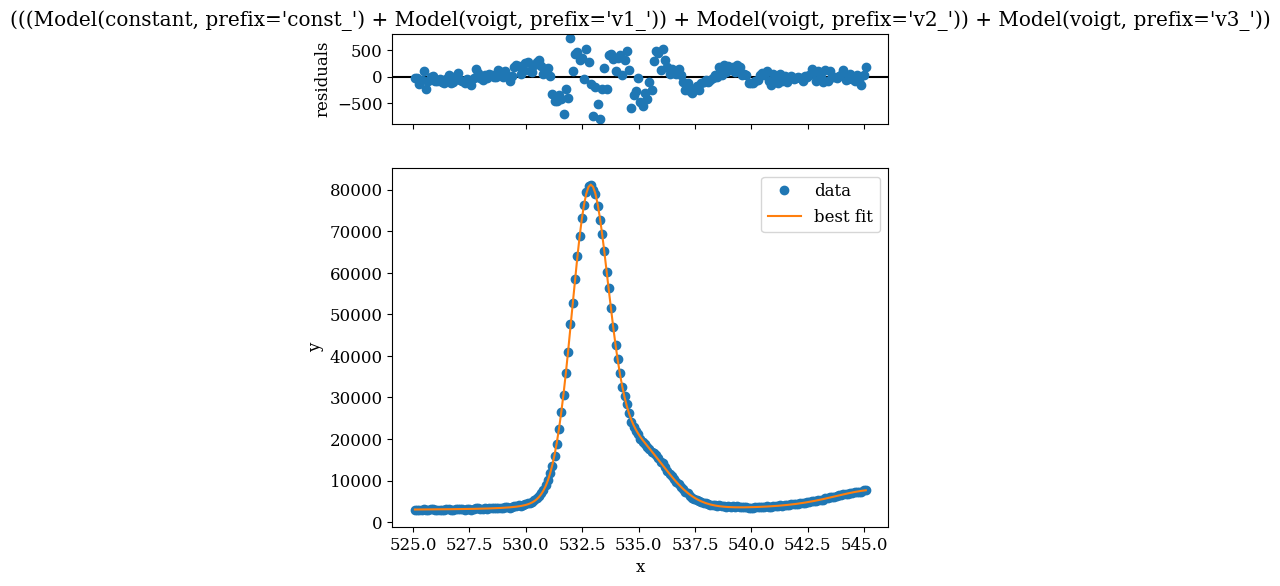

In [30]:
params_O1s["const_c"].set(value=4000)

params_O1s["v1_amplitude"].set(value=190300, min=30000)
params_O1s["v1_center"].set(value=532.5, min=532, max=533.5)
params_O1s["v1_sigma"].set(value=0.6, min=0.4, max=3.5)
params_O1s["v1_gamma"].set(vary=True)

params_O1s["v2_amplitude"].set(value=60000, min=7000)
params_O1s["v2_center"].set(value=534.2, min=533.5, max=535.5)
params_O1s["v2_sigma"].set(value=1.3, min=0.2, max=2)
params_O1s["v2_gamma"].set(vary=True)

params_O1s["v3_amplitude"].set(value=26000, min=1000)
params_O1s["v3_center"].set(value=547.5, min=545, max=550.5)
params_O1s["v3_sigma"].set(value=1.4, min=0.4, max=4)
params_O1s["v3_gamma"].set(vary=True)

resultado_O1s = modelo_composto_O1s.fit(y_O1s, params_O1s, x=X_O1s)
resultado_O1s.plot(); 

print(resultado_O1s.fit_report())

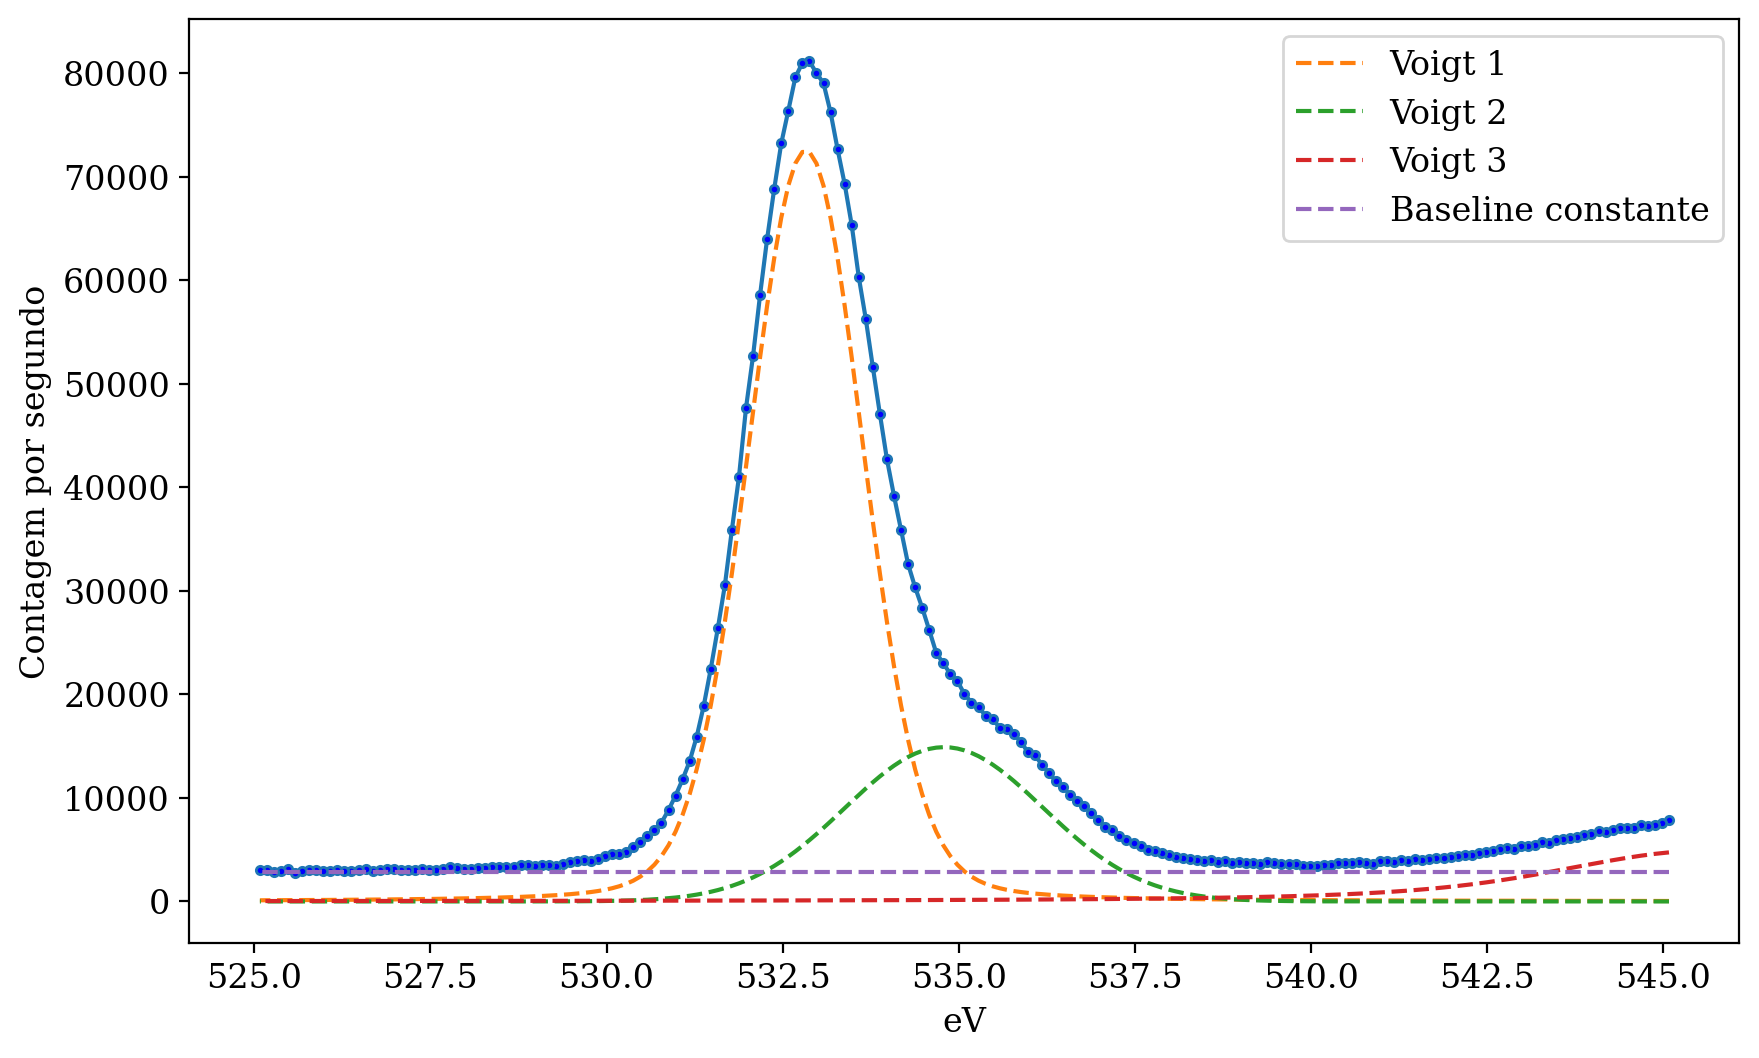

In [31]:
componentes = resultado_O1s.eval_components(x=X_O1s)

fig, eixo = plt.subplots(figsize=(10, 6), dpi=200)
eixo.plot(X_O1s, y_O1s, marker="o", markerfacecolor="blue", markersize=3)
eixo.plot(X_O1s, componentes["v1_"], "--", label="Voigt 1")
eixo.plot(X_O1s, componentes["v2_"], "--", label="Voigt 2")
eixo.plot(X_O1s, componentes["v3_"], "--", label="Voigt 3")
eixo.plot(X_O1s, componentes["const_"], "--", label="Baseline constante")
eixo.set(xlabel="eV", ylabel="Contagem por segundo")

eixo.legend();

### **Gráfico Final - O1s**

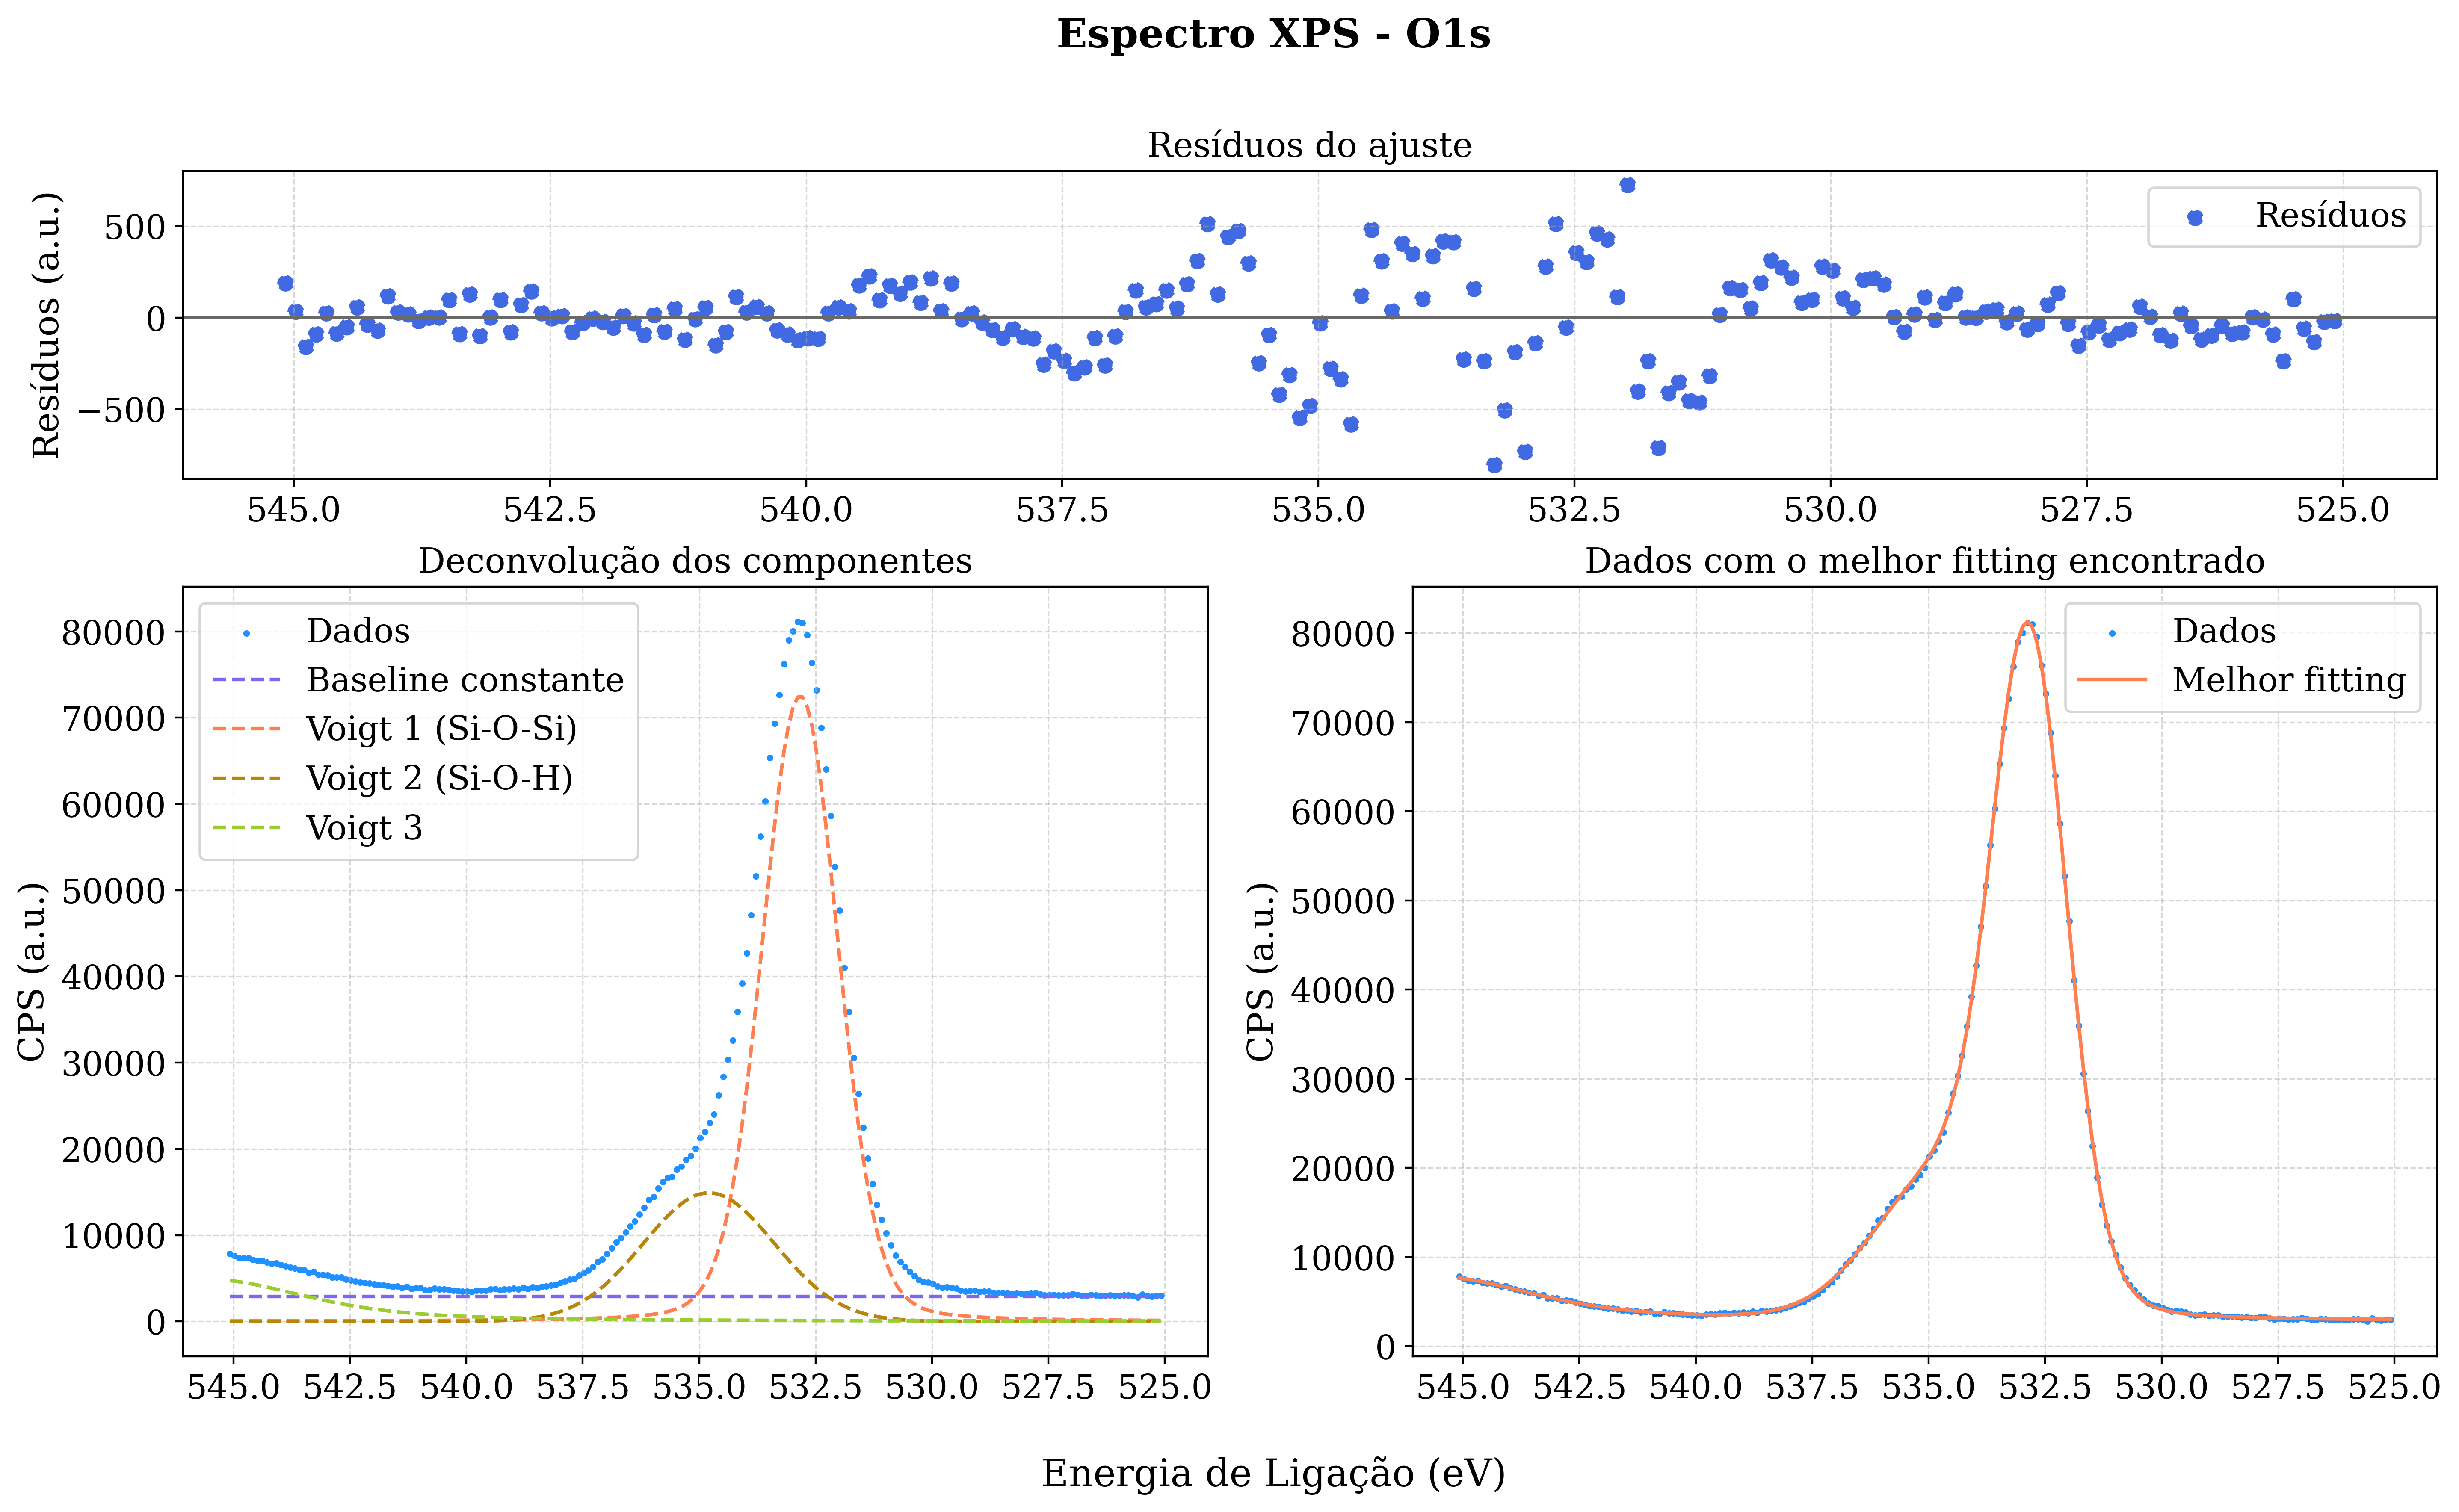

In [32]:
residuo_O1s = resultado_O1s.residual
melhor_fit_O1s = resultado_O1s.best_fit
componentes = resultado_O1s.eval_components(x=X_O1s) 

fig = plt.figure(figsize=(17, 9), dpi=400)
gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[0.4, 1])

ax1 = fig.add_subplot(gs[0, :])
ax1.scatter(X_O1s, residuo_O1s, linestyle="--", marker="o", label="Resíduos", c="royalblue")
ax1.axhline(y=0, color="dimgray", linestyle='-', linewidth=1.4)
ax1.grid(linestyle='--', linewidth=0.6, alpha=0.5)
ax1.set_title("Resíduos do ajuste")
ax1.set_ylabel("Resíduos (a.u.)", fontsize=15)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.invert_xaxis()
ax1.legend(fontsize=14)

ax2 = fig.add_subplot(gs[1, 0])
ax2.scatter(X_O1s, y_O1s, s=3, label="Dados", c="dodgerblue")
ax2.plot(X_O1s, componentes["const_"], linestyle="--", c="mediumslateblue", label="Baseline constante")
ax2.plot(X_O1s, componentes["v1_"], linestyle="--", label="Voigt 1 (Si-O-Si)", c="coral")
ax2.plot(X_O1s, componentes["v2_"], linestyle="--", label="Voigt 2 (Si-O-H)", c="darkgoldenrod")
ax2.plot(X_O1s, componentes["v3_"], linestyle="--", label="Voigt 3", c="yellowgreen")
ax2.grid(linestyle='--', linewidth=0.6, alpha=0.5)
ax2.set_title("Deconvolução dos componentes")
ax2.set_ylabel("CPS (a.u.)", fontsize=15)
ax2.invert_xaxis()
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(fontsize=14)

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(X_O1s, y_O1s, s=3, label="Dados", c="dodgerblue")
ax3.plot(X_O1s, melhor_fit_O1s, c="coral", label="Melhor fitting")
ax3.grid(linestyle='--', linewidth=0.6, alpha=0.5)
ax3.set_title("Dados com o melhor fitting encontrado")
ax3.set_ylabel("CPS (a.u.)", fontsize=15)
ax3.invert_xaxis()
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax3.legend(fontsize=14)
    
fig.supxlabel("Energia de Ligação (eV)", fontsize=16, y=0.02)

fig.suptitle("Espectro XPS - O1s", fontsize=17, weight='bold', y=0.98)

plt.show()


## **Si2p**

K.E.   Counts  Unnamed: 2    B.E.      CPS
0  1376.6  292.936         NaN  110.08  585.872
1  1376.7  306.445         NaN  109.98  612.890
2  1376.8  285.664         NaN  109.88  571.328
3  1376.9  303.969         NaN  109.78  607.938
4  1377.0  306.520         NaN  109.68  613.040

(151, 5)


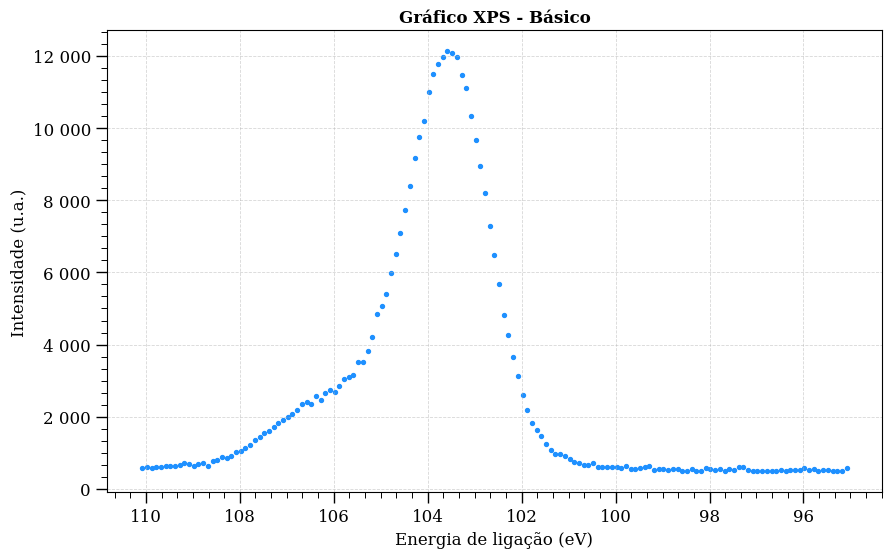

In [33]:
path_Si2p = "dados/xps_si2p scan.csv"

df_Si2p = pd.read_csv(path_Si2p, skiprows=7)
dados_Si2p = df_Si2p[["B.E.", "CPS"]]

display(df_Si2p.head())
print(df_Si2p.shape)

X_Si2p = np.array(df_Si2p["B.E."])
y_Si2p = np.array(df_Si2p["CPS"])

basic_plot(X_Si2p, y_Si2p)

In [34]:
modelo_linear_Si2p = LinearModel(prefix='lin_')
modelo_Voigt1_Si2p = VoigtModel(prefix="v1_")
modelo_Voigt2_Si2p = VoigtModel(prefix="v2_")

modelo_composto_Si2p = (
  modelo_linear_Si2p
  + modelo_Voigt1_Si2p 
  + modelo_Voigt2_Si2p 
)

print(f"Variável independente: {modelo_composto_Si2p.independent_vars}")
print(f"Parâmetros do modelo: {modelo_composto_Si2p.param_names}")

params_linear_Si2p = modelo_linear_Si2p.make_params()
params_Voigt1_Si2p = modelo_Voigt1_Si2p.make_params()
params_Voigt2_Si2p = modelo_Voigt2_Si2p.make_params()

params_Si2p = (
  params_linear_Si2p
  + params_Voigt1_Si2p 
  + params_Voigt2_Si2p 
)

display(params_Si2p)

Variável independente: [np.str_('x')]
Parâmetros do modelo: ['lin_slope', 'lin_intercept', 'v1_amplitude', 'v1_center', 'v1_sigma', 'v2_amplitude', 'v2_center', 'v2_sigma']


Parameters([('lin_slope', <Parameter 'lin_slope', value=1.0, bounds=[-inf:inf]>), ('lin_intercept', <Parameter 'lin_intercept', value=0.0, bounds=[-inf:inf]>), ('v1_amplitude', <Parameter 'v1_amplitude', value=1.0, bounds=[-inf:inf]>), ('v1_center', <Parameter 'v1_center', value=0.0, bounds=[-inf:inf]>), ('v1_sigma', <Parameter 'v1_sigma', value=1.0, bounds=[0:inf]>), ('v1_gamma', <Parameter 'v1_gamma', value=1.0, bounds=[-inf:inf], expr='v1_sigma'>), ('v1_fwhm', <Parameter 'v1_fwhm', value=np.float64(3.6012906381881353), bounds=[-inf:inf], expr='1.0692*v1_gamma+sqrt(0.8664*v1_gamma**2+5.545083*v1_sigma**2)'>), ('v1_height', <Parameter 'v1_height', value=np.float64(0.20870928052036772), bounds=[-inf:inf], expr='(v1_amplitude/(max(1e-15, v1_sigma*sqrt(2*pi))))*real(wofz((1j*v1_gamma)/(max(1e-15, v1_sigma*sqrt(2)))))'>), ('v2_amplitude', <Parameter 'v2_amplitude', value=1.0, bounds=[-inf:inf]>), ('v2_center', <Parameter 'v2_center', value=0.0, bounds=[-inf:inf]>), ('v2_sigma', <Parameter 'v2_sigma', value=1.0, bounds=[0:inf]>), ('v2_gamma', <Parameter 'v2_gamma', value=1.0, bounds=[-inf:inf], expr='v2_sigma'>), ('v2_fwhm', <Parameter 'v2_fwhm', value=np.float64(3.6012906381881353), bounds=[-inf:inf], expr='1.0692*v2_gamma+sqrt(0.8664*v2_gamma**2+5.545083*v2_sigma**2)'>), ('v2_height', <Parameter 'v2_height', value=np.float64(0.20870928052036772), bounds=[-inf:inf], expr='(v2_amplitude/(max(1e-15, v2_sigma*sqrt(2*pi))))*real(wofz((1j*v2_gamma)/(max(1e-15, v2_sigma*sqrt(2)))))'>)])

[[Model]]
    ((Model(linear, prefix='lin_') + Model(voigt, prefix='v1_')) + Model(voigt, prefix='v2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 287
    # data points      = 151
    # variables        = 10
    chi-square         = 581122.095
    reduced chi-square = 4121.43330
    Akaike info crit   = 1266.57088
    Bayesian info crit = 1296.74368
    R-squared          = 0.99964129
[[Variables]]
    lin_slope:      8.39625252 +/- 8.42343822 (100.32%) (init = 10)
    lin_intercept: -288.262158 +/- 804.071721 (278.94%) (init = -400)
    v1_amplitude:   23900.0000 +/- 143.573066 (0.60%) (init = 10000)
    v1_center:      103.523143 +/- 0.00511606 (0.00%) (init = 103.3)
    v1_sigma:       0.78872411 +/- 0.01821394 (2.31%) (init = 0.3)
    v1_gamma:       0.10893642 +/- 0.04111320 (37.74%) (init = 1)
    v1_fwhm:        1.97652822 +/- 0.01285437 (0.65%) == '1.0692*v1_gamma+sqrt(0.8664*v1_gamma**2+5.545083*v1_sigma**2)'
    v1_height:      10863.9392 +/

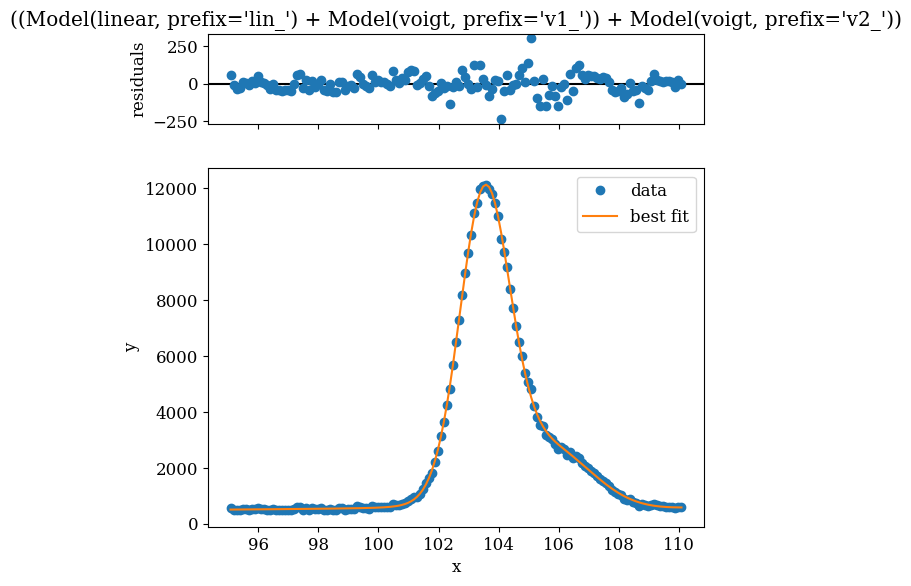

In [35]:
params_Si2p["lin_slope"].set(value=10)
params_Si2p["lin_intercept"].set(value=-400)

params_Si2p["v1_amplitude"].set(value=10000, min=3000, max=23900)
params_Si2p["v1_center"].set(value=103.3, min=103, max=105)
params_Si2p["v1_sigma"].set(value=0.3, min=0.1, max=2.5)
params_Si2p["v1_gamma"].set(vary=True)

params_Si2p["v2_amplitude"].set(value=10000, min=1000)
params_Si2p["v2_center"].set(value=106, min=105, max=107)
params_Si2p["v2_sigma"].set(value=2.7, min=0.2, max=4)
params_Si2p["v2_gamma"].set(vary=True)

resultado_Si2p = modelo_composto_Si2p.fit(y_Si2p, params_Si2p, x=X_Si2p)
resultado_Si2p.plot(); 

print(resultado_Si2p.fit_report())

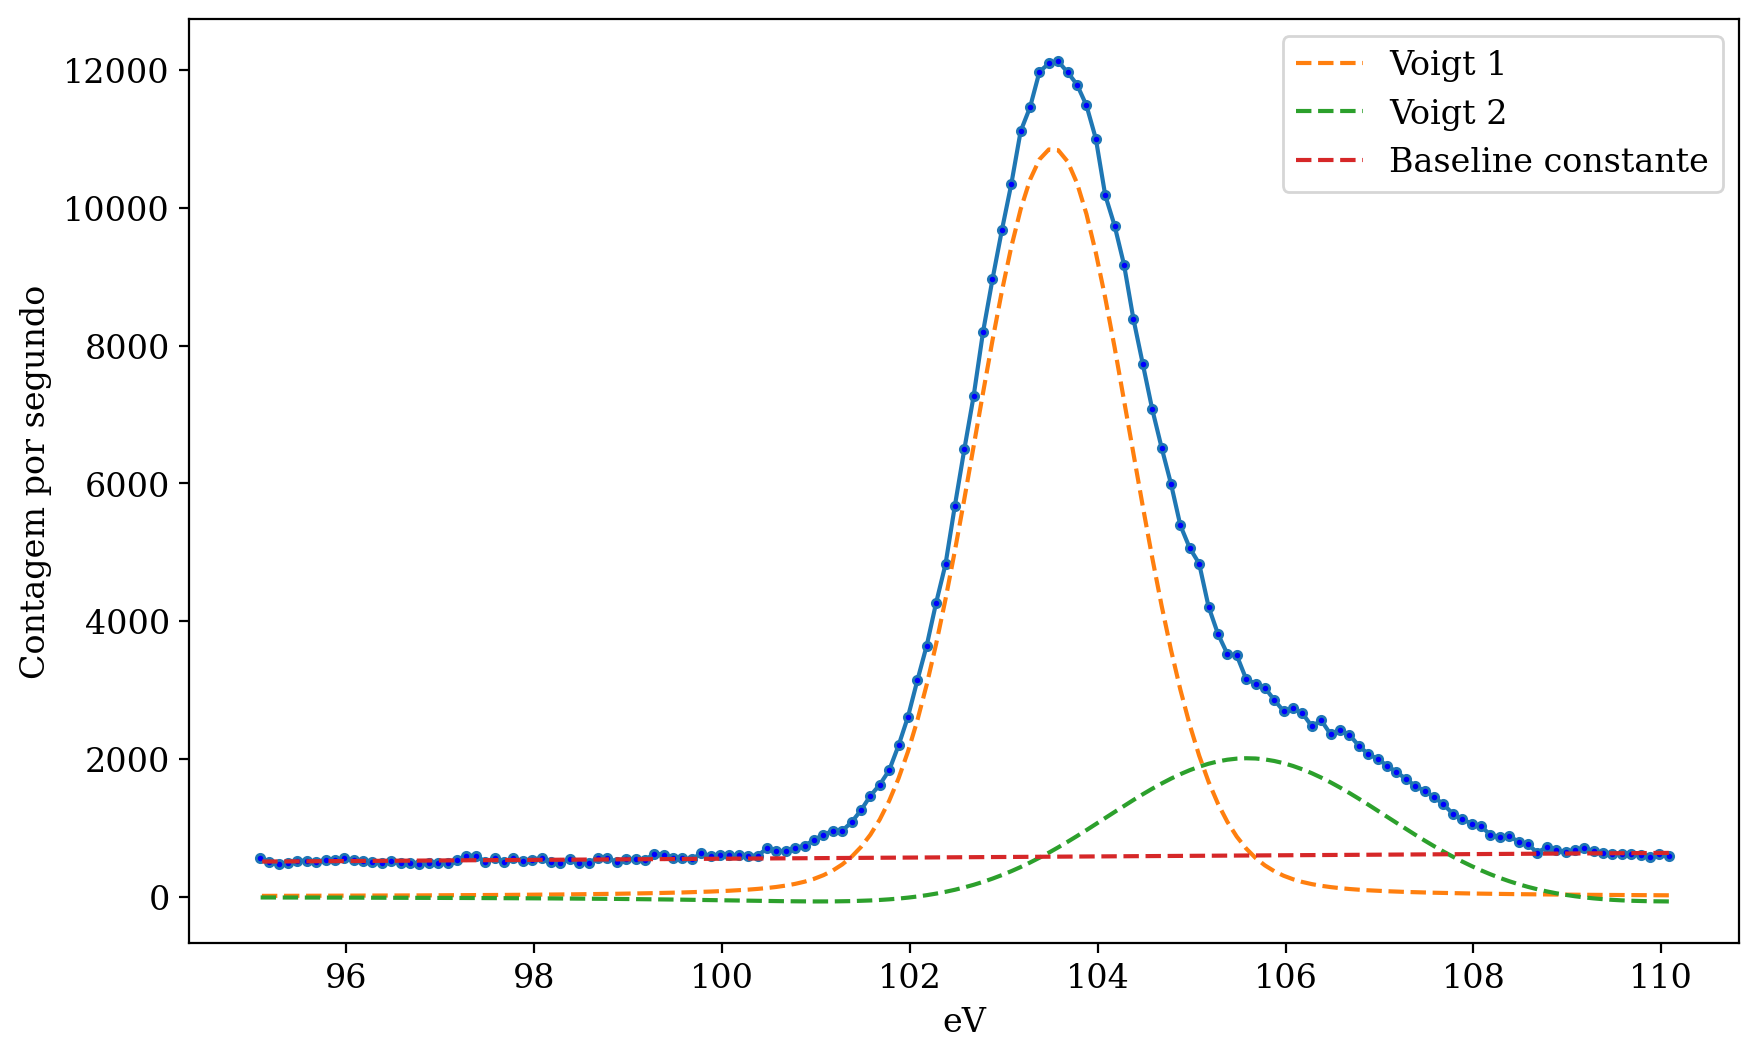

In [36]:
componentes = resultado_Si2p.eval_components(x=X_Si2p)

fig, eixo = plt.subplots(figsize=(10, 6), dpi=200)
eixo.plot(X_Si2p, y_Si2p, marker="o", markerfacecolor="blue", markersize=3)
eixo.plot(X_Si2p, componentes["v1_"], "--", label="Voigt 1")
eixo.plot(X_Si2p, componentes["v2_"], "--", label="Voigt 2")
eixo.plot(X_Si2p, componentes["lin_"], "--", label="Baseline constante")
eixo.set(xlabel="eV", ylabel="Contagem por segundo")

eixo.legend();

### **Gráfico Final - Si2p**

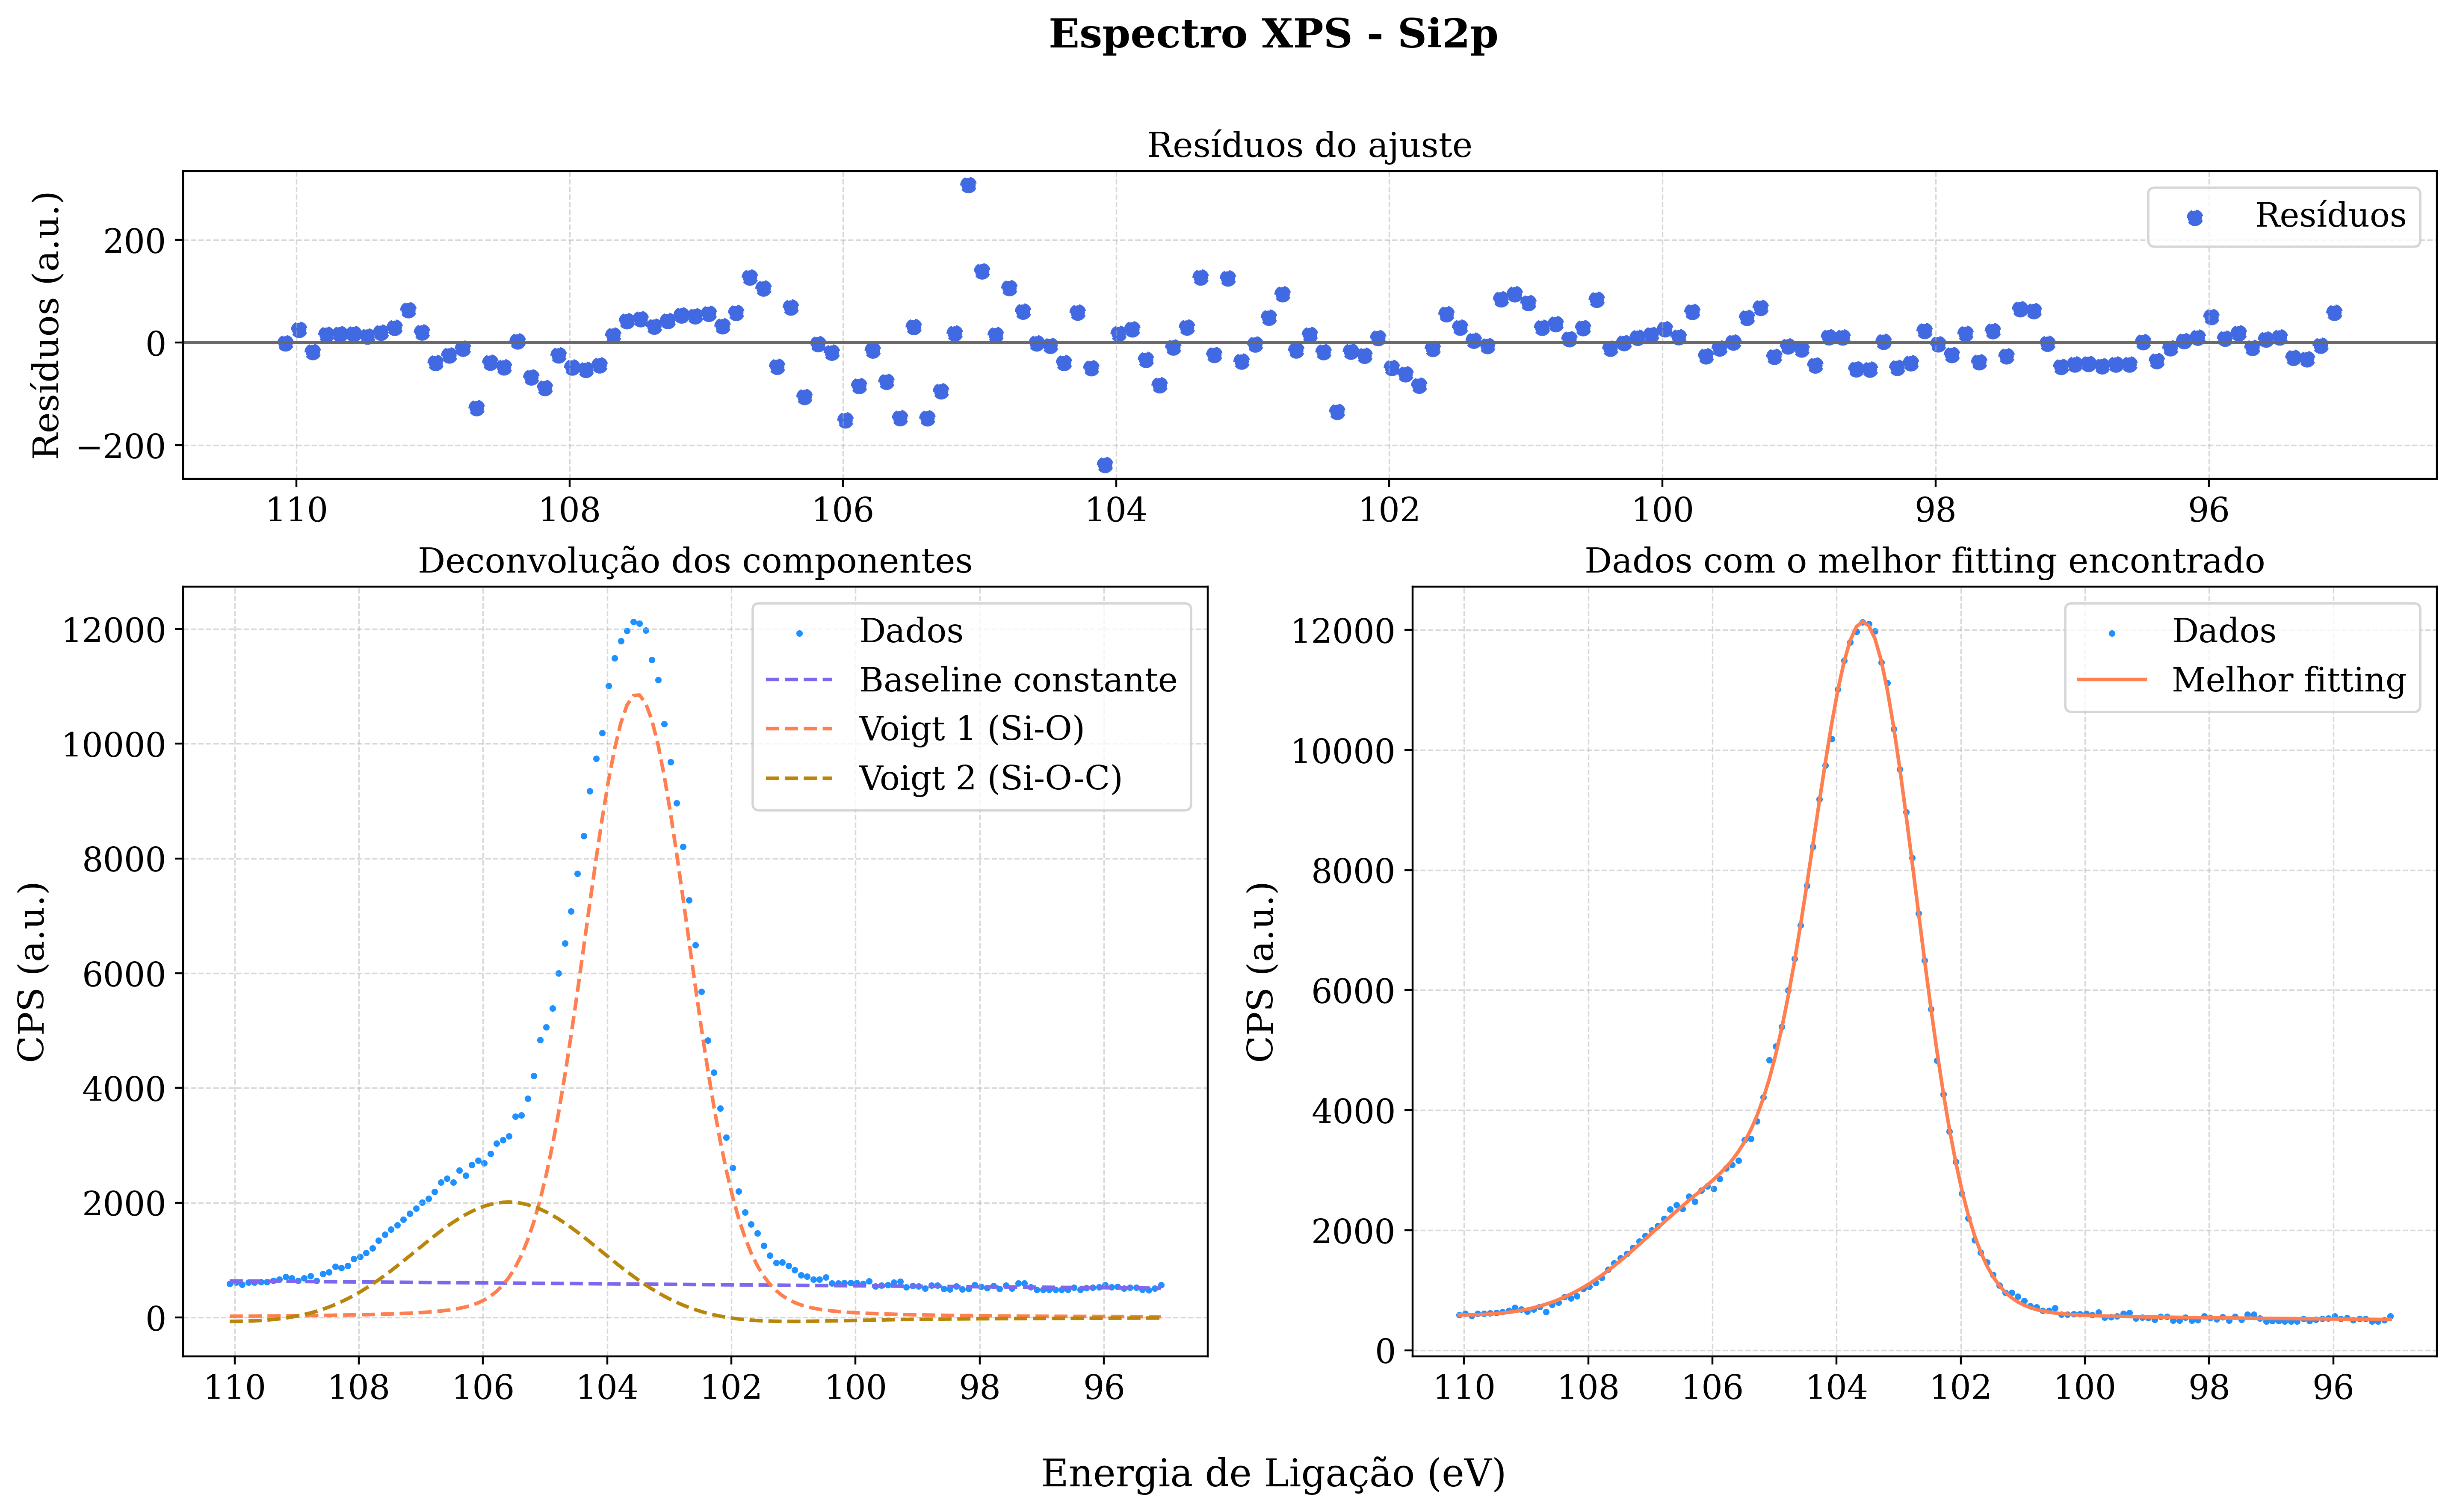

In [37]:
residuo_Si2p = resultado_Si2p.residual
melhor_fit_Si2p = resultado_Si2p.best_fit
componentes = resultado_Si2p.eval_components(x=X_Si2p) 

fig = plt.figure(figsize=(17, 9), dpi=400)
gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[0.4, 1])

ax1 = fig.add_subplot(gs[0, :])
ax1.scatter(X_Si2p, residuo_Si2p, linestyle="--", marker="o", label="Resíduos", c="royalblue")
ax1.axhline(y=0, color="dimgray", linestyle='-', linewidth=1.4)
ax1.grid(linestyle='--', linewidth=0.6, alpha=0.5)
ax1.set_title("Resíduos do ajuste")
ax1.set_ylabel("Resíduos (a.u.)", fontsize=15)
ax1.invert_xaxis()
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(fontsize=14)

ax2 = fig.add_subplot(gs[1, 0])
ax2.scatter(X_Si2p, y_Si2p, s=3, label="Dados", c="dodgerblue")
ax2.plot(X_Si2p, componentes["lin_"], linestyle="--", c="mediumslateblue", label="Baseline constante")
ax2.plot(X_Si2p, componentes["v1_"], linestyle="--", label="Voigt 1 (Si-O)", c="coral")
ax2.plot(X_Si2p, componentes["v2_"], linestyle="--", label="Voigt 2 (Si-O-C)", c="darkgoldenrod")
ax2.grid(linestyle='--', linewidth=0.6, alpha=0.5)
ax2.set_title("Deconvolução dos componentes")
ax2.set_ylabel("CPS (a.u.)", fontsize=15)
ax2.invert_xaxis()
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(fontsize=14)

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(X_Si2p, y_Si2p, s=3, label="Dados", c="dodgerblue")
ax3.plot(X_Si2p, melhor_fit_Si2p, c="coral", label="Melhor fitting")
ax3.grid(linestyle='--', linewidth=0.6, alpha=0.5)
ax3.set_title("Dados com o melhor fitting encontrado")
ax3.set_ylabel("CPS (a.u.)", fontsize=15)
ax3.invert_xaxis()
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax3.legend(fontsize=14)

fig.supxlabel("Energia de Ligação (eV)", fontsize=16, y=0.02)

fig.suptitle("Espectro XPS - Si2p", fontsize=17, weight='bold', y=0.98)

plt.show()


## **Survey**

K.E.   Counts  Unnamed: 2     B.E.      CPS
0  136.6  3628.15         NaN  1350.08  36281.5
1  137.6  3629.34         NaN  1349.08  36293.4
2  138.6  3555.52         NaN  1348.08  35555.2
3  139.6  3594.77         NaN  1347.08  35947.7
4  140.6  3593.36         NaN  1346.08  35933.6

(1361, 5)


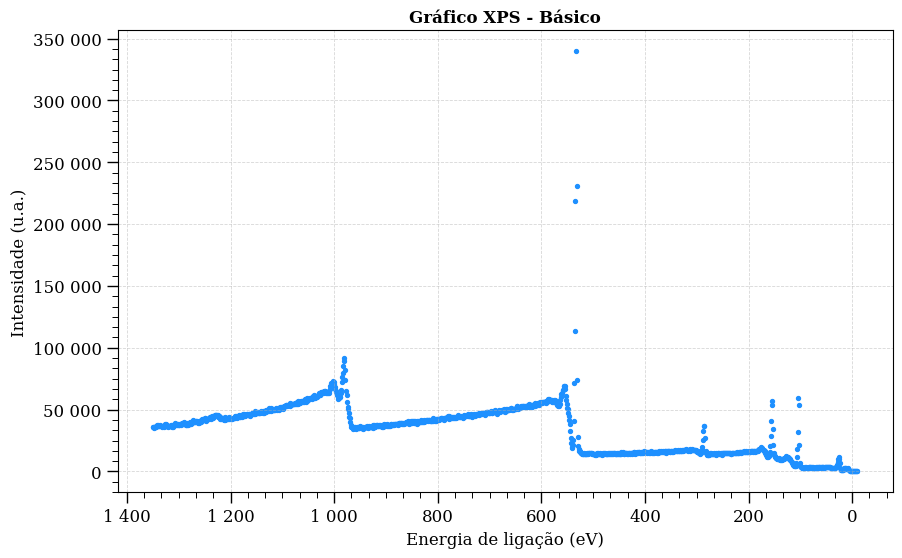

In [38]:
path_survey = "dados/xps_survey.csv"

df_survey = pd.read_csv(path_survey, skiprows=7)
dados_survey = df_survey[["B.E.", "CPS"]]

display(df_survey.head())
print(df_survey.shape)

X_survey = np.array(df_survey["B.E."])
y_survey = np.array(df_survey["CPS"])

basic_plot(X_survey, y_survey)

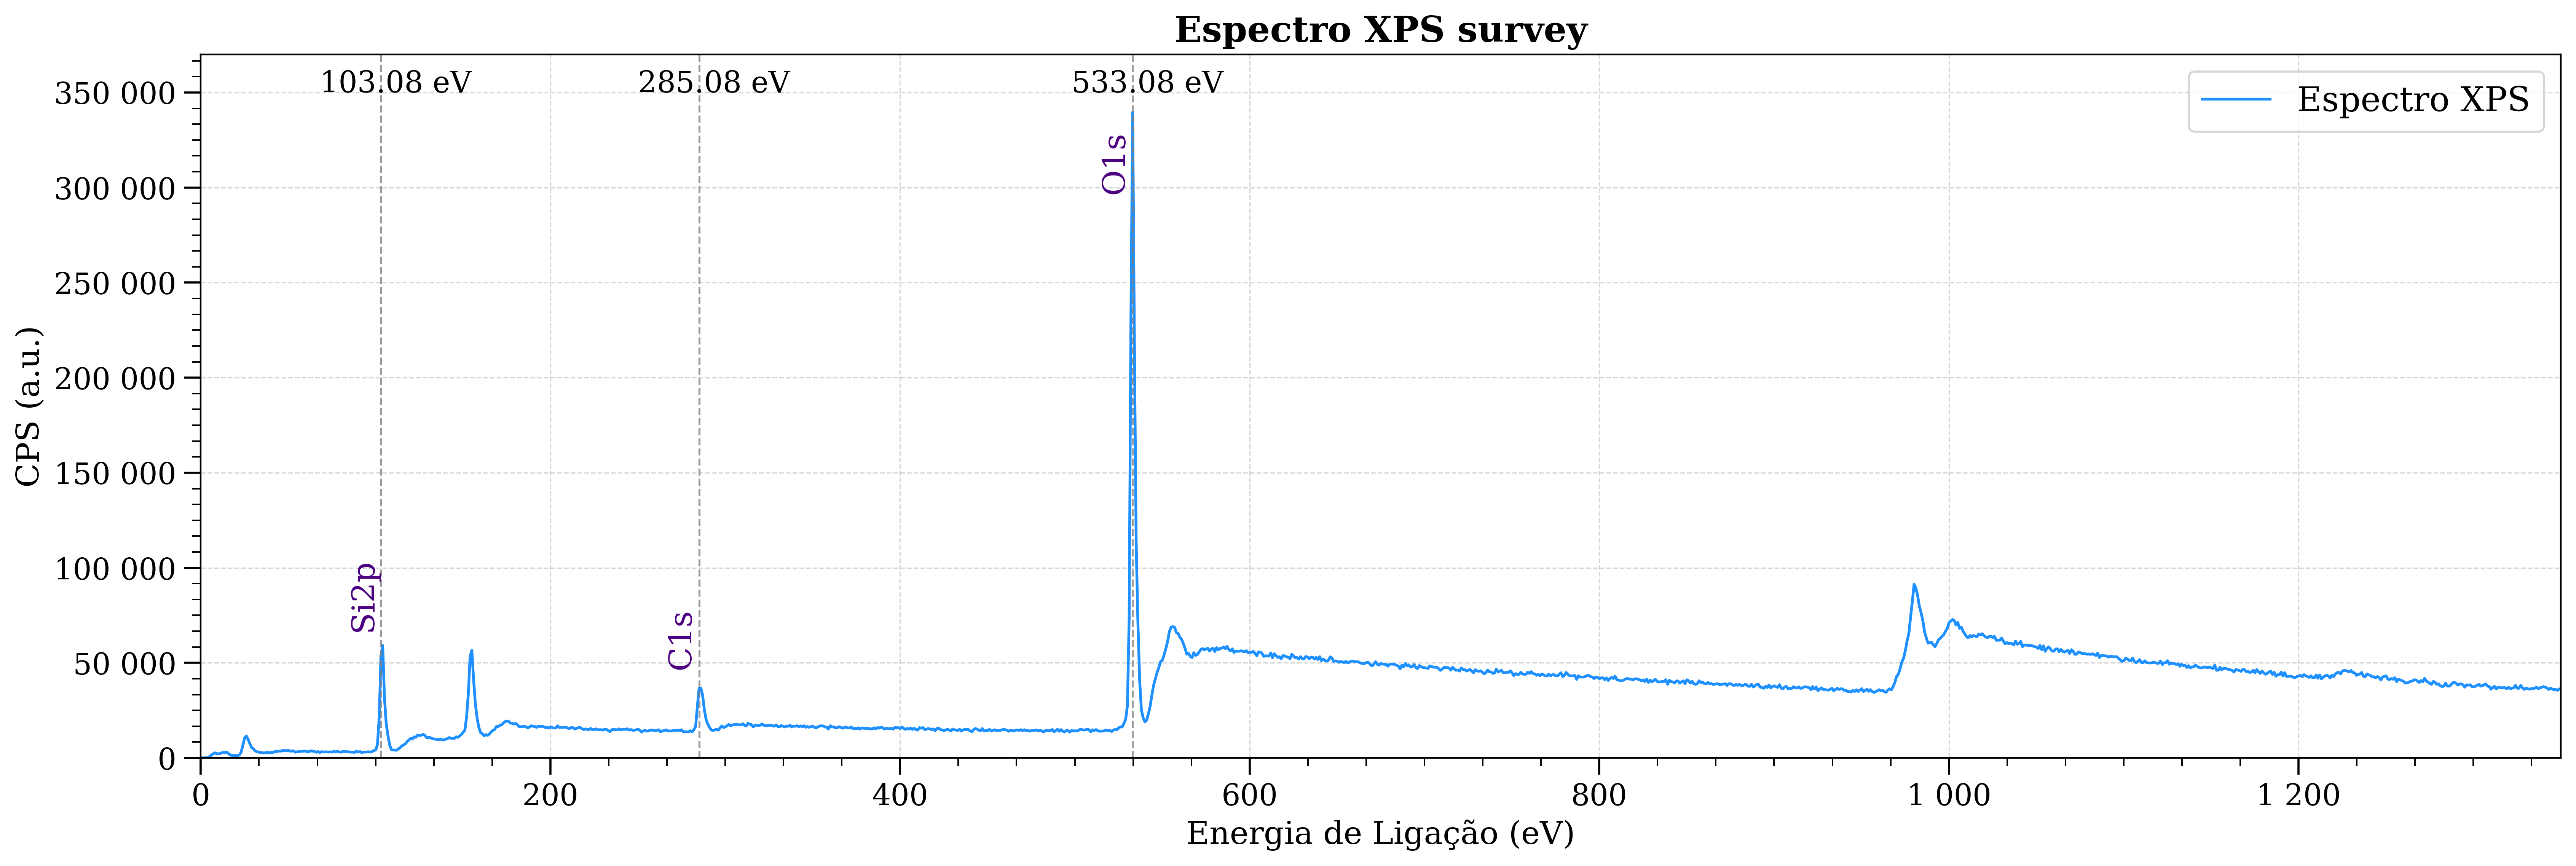

In [39]:
def formatar_espaco(x, pos):
        return f"{x:,.0f}".replace(",", " ")

plt.figure(figsize=(20,6), dpi=400)
plt.plot(X_survey, y_survey, color="dodgerblue", linewidth=1.3, label="Espectro XPS")
plt.xlabel("Energia de Ligação (eV)", fontsize=15)
plt.ylabel("CPS (a.u.)", fontsize=15)
plt.title("Espectro XPS survey", fontweight="bold", fontsize=17)
plt.xlim(min(X_survey), max(X_survey))
plt.grid(linestyle="--", linewidth=0.6, alpha=0.5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(6))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(6))
ax.tick_params(axis="both", which="major", length=8, width=1)
ax.tick_params(axis="both", which="minor", length=4, width=0.7)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))
ax.set_ylim(bottom=0, top=370000)
ax.set_xlim(left=0)

regioes = {
        "Si2p": [(103, 104), 70000],
        "O1s": [(532, 534), 300000],
        "C1s": [(284, 286), 50000],
}

def encontrar_pico(regiao_x, regiao_y):
    idx = np.argmax(regiao_y)
    return regiao_x[idx], regiao_y[idx]

for elemento, [regiao, y_text] in regioes.items():
        mask = (X_survey > regiao[0]) & (X_survey < regiao[1])

        x_local, y_max = encontrar_pico(X_survey[mask], y_survey[mask])
        ax.vlines(x_local, ymin=0, ymax=370000, color="grey", linestyle="--", alpha=0.8, linewidth=0.9)
        ax.text(x_local-10, y_text, f"{elemento}", horizontalalignment="center", rotation=90, fontsize=15, color="indigo")
        ax.text(x=x_local - 35, y=350000, s=f"{x_local} eV", fontsize=14)

plt.legend(fontsize=16)
plt.show()


## **Referências**

[1] - https://www.researchgate.net/figure/High-resolution-XPS-spectra-of-Si-2p-peaks-for-the-coatings-with-the-O-2-TMS-ratio-of_fig8_322871606

[2] - CASSAR, Daniel. Aula de Regressão não Linear.